> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

# Dataset:

TMDB movies dataset selected to investigate and analyze data,it contains data for 10,000 movies collected from movies database .it consiste 21 columnes and 10866 rows such as revenue budget ect.

# Questions:

1-Which movies had highest and least profit?

2-Top 10 movies based on vote?

3-there is relation between amount of investment and profit?

4-What is the relation between profit and runtime?

5-What is the relation between profit and popularity?

6-there is relation between profit and release year?

7-what is the highest movies genres ?


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

On this section the unnecessary data like duplicates and null value which will not help on answering the previous questions will be removed.

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
df= pd.read_csv('movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


In [18]:
# to check general properties 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [69]:
# count number of rows and columns
df= pd.read_csv('movies.csv')
print('number of rows and columns on TMDB database:' , df.shape)

number of rows and columns on TMDB database: (10866, 21)


In [9]:
## To display( min, 25%, 50%, 75%, max ...ect)
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning :

# After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.

After displaying dataset in this part the following operations will be applied to our dataset to be sure that our dataset cleaned :

1-Remove duplicate.

2-Chang incorrect data type .

3-remove unused columns and rows.



1-Check duplicate then remove it :

In [11]:
sum(df.duplicated())


1

In [16]:
df.drop_duplicates(inplace=True)


In [17]:
sum(df.duplicated())

0

2-Chang incorrect data type .

In [20]:
#change data type for release_year from int to date
df['release_date'] = pd.to_datetime(df['release_date'])


3-remove unused columns and rows:in this step some rows and columns which not needed on analyzing the database it will be removed like tagline,homepage and overview .


In [70]:
df.drop(['overview','homepage','tagline','cast','director','keywords','budget_adj','revenue_adj'],axis =1,inplace = True)
print("Afetr adjusment  ",df.shape)

Afetr adjusment   (10866, 13)


In [71]:
temp_list=['budget', 'revenue','production_companies']
#this will replace all the value from '0' to NAN in the list
df[temp_list] = df[temp_list].replace(0, np.NAN)
df.dropna(subset = temp_list, inplace = True)

rows, col = df.shape
print('After removing unnecessary entries {} is the number of movies.'.format(rows-1))

After removing unnecessary entries 3808 is the number of movies.


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which movies had highest and least profit)


In [73]:
#find profite:
df.insert(2,'profit_earned',df['revenue']-df['budget'])
#display the result
df.head(2)

,id,imdb_id,profit_earned,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,1.363529e+09,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,76341,tt1392190,2.284364e+08,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015


In [76]:
def find_minmax(x):
    # idmin function used to find the highest & least profit movie.
    least = df[x].idxmin()
    high = df[x].idxmax()
   #to display details of the highest &least movie profit 
    high_details=pd.DataFrame(df.loc[high])
    least_details=pd.DataFrame(df.loc[least])
    info=pd.concat([high_details, least_details], axis=1)

    return info

#calling 
find_minmax('profit_earned')



,1386,2244
id,19995,46528
imdb_id,tt0499549,tt1032751
profit_earned,2.54451e+09,-4.13912e+08
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


      Based on the result movie with ID 19995 has the highest profit and ID 46528 had the least profit.

### Research Question 2 (Top 10 movies based on vote?)


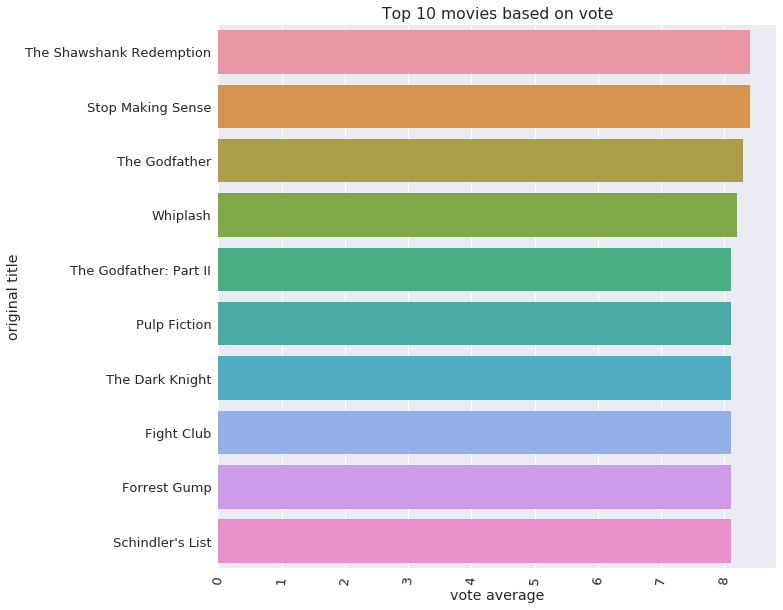

In [75]:
top = df[['original_title', 'vote_average']] 
sns.set( rc = {'figure.figsize':(10,10)}, font_scale=1.3)
ax = sns.barplot(
    top.sort_values(by = 'vote_average', ascending=False).head(10).vote_average, 
    top.sort_values(by = 'vote_average', ascending=False).head(10).original_title)

for item in ax.get_xticklabels():
    item.set_rotation(85)
# adjust chart settings    
ax.set(xlabel='vote average', ylabel='original title', title = 'Top 10 movies based on vote')
plt.show()

This chart display the rating of movies based on average rate.

### Research Question 3 (there is relation between amount of investment and profit?)

relation between profit & budget : 0.525242968994


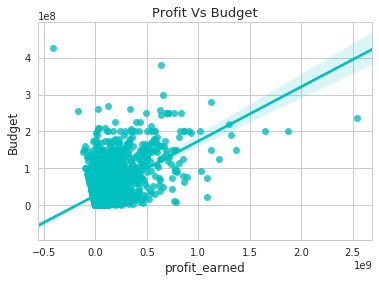

In [78]:
re = sns.regplot(x=df['profit_earned'], y=df['budget'],color='c')
# adjust chart settings    
re.set_title("Profit Vs Budget",fontsize=13)
re.set_xlabel("profit_earned",fontsize=12)
re.set_ylabel("Budget",fontsize=12)
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")
res = df.corr()
print('relation between profit & budget :',res.loc['profit_earned','budget'])

### Research Question 4(What is the   relation between profit   and runtime?)


relation between profit & runtime : 0.218943392562


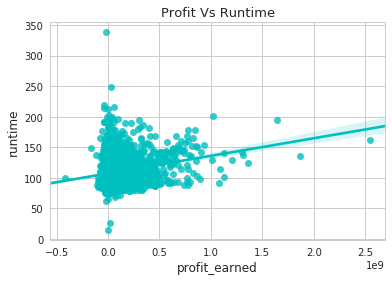

In [79]:
re = sns.regplot(x=df['profit_earned'], y=df['runtime'],color='c')
# adjust chart settings    
re.set_title("Profit Vs Runtime",fontsize=13)
re.set_xlabel("profit_earned",fontsize=12)
re.set_ylabel("runtime",fontsize=12)
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")
res = df.corr()

print('relation between profit & runtime :',res.loc['profit_earned','runtime'])

### Research Question 5(What is the relation between profit and popularity?)

relation between profit & popularity : 0.594981919035


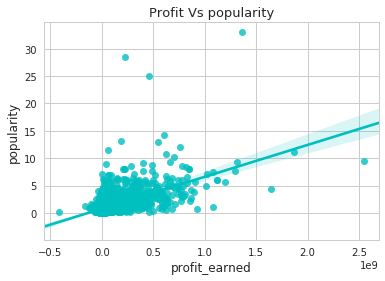

In [82]:
re = sns.regplot(x=df['profit_earned'], y=df['popularity'],color='c')
# adjust chart settings    
re.set_title("Profit Vs popularity",fontsize=13)
re.set_xlabel("profit_earned",fontsize=12)
re.set_ylabel("popularity",fontsize=12)
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")
res = df.corr()

print('relation between profit & popularity :',res.loc['profit_earned','popularity'])

### Research Question 6(There is the relation between profit and release year?)

relation between profit & release year : 0.0891926648215


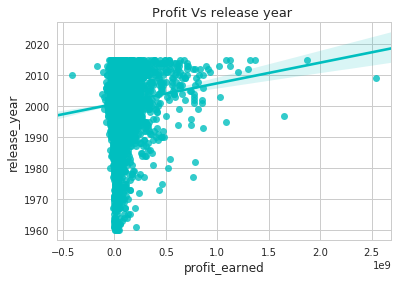

In [88]:
re = sns.regplot(x=df['profit_earned'], y=df['release_year'],color='c')
# adjust chart settings    
re.set_title("Profit Vs release year ",fontsize=13)
re.set_xlabel("profit_earned",fontsize=12)
re.set_ylabel("release_year",fontsize=12)
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")
res = df.corr()

print('relation between profit & release year :',res.loc['profit_earned','release_year'])

### Research Question 7(what is the highest movies genres ?)

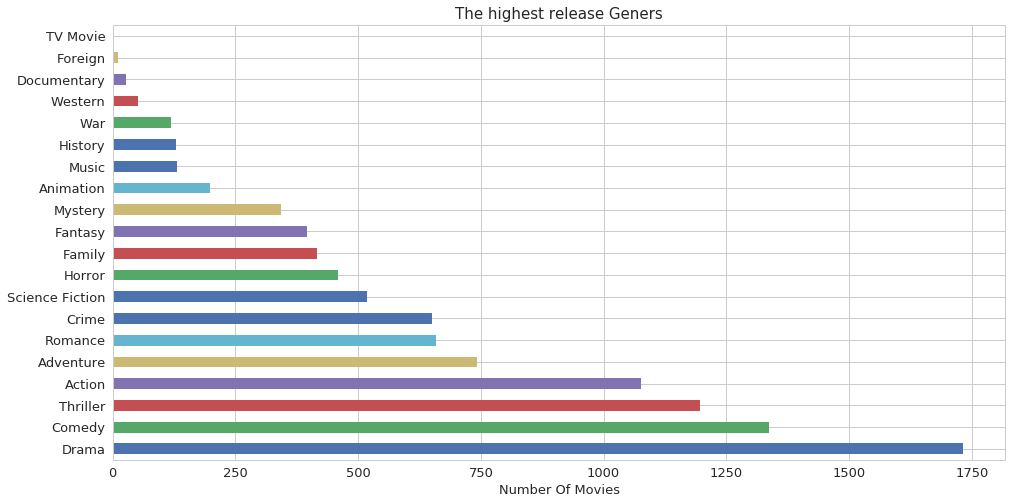

In [87]:
#display the count of each geners 
def count_genre(x):
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=False)
    return info

#calling function
genre_movies = count_genre('genres')
## adjust chart settings    
genre_movies.iloc[:20].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("The highest release Geners",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
sns.set_style("whitegrid")

# conclusion:


This dataset includes a lot of data that helped on investigate and analyze. After went through the analyzing process we can conclude with the following results:

•There are 20 genres type and Drama is the most genres release then comedy followed by thriller.

•The shawshank Redemptio is the most popular movie based on average rate.

•Movie with ID 19995 had the highest profit and ID 46528 had the least profit.

•There is positive correlation 0.525 between profit and budget. That mean what ever you invest on your move whit right management it will return on your profit.

•Based on the data analyzing there is 0.218 correlation between profit and runtime, so it is week.
•There is a corresponding increase relation between profit and popularity. Correlation: 0.594.

•There is 0.08 correlation between Movies profit and release year, so we don’t have to  consider release year as effective factor on our decision .

Limitation:
There are some movies with multiple genres ,so it will give us un pure result, in additional ,there are null and duplicate data that also affect the analyzing process .  




In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])